# Coleta de dados e pacotes utilizados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este notebook apresenta uma breve análise exploratória do conjunto de dados Bakery Sales (disponível em: https://www.kaggle.com/datasets/akashdeepkuila/bakery/data). Nele, busco demonstrar algumas técnicas simples, porém interessantes, para extrair insights de dados aparentemente pouco informativos.

In [41]:
plt.style.use("bmh")

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('Bakery.csv')

df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


# Visão Geral

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


Temos três colunas indicadas como "object"  e uma tratada como inteiro.

In [6]:
type(df['DateTime'][0])

str

In [7]:
df.isnull().sum()

,0
TransactionNo,0
Items,0
DateTime,0
Daypart,0
DayType,0


In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

type(df['DateTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  20507 non-null  int64         
 1   Items          20507 non-null  object        
 2   DateTime       20507 non-null  datetime64[ns]
 3   Daypart        20507 non-null  object        
 4   DayType        20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


# Análise Exploratória de Dados

In [10]:
print(f" Quantidade de vendas na amostra: {df['TransactionNo'].nunique()}")

 Quantidade de vendas na amostra: 9465


Como o TransactionNo é o identificador único para cada transação, o método do pandas "nunique()" nos dá a quantidade de vendas na amostra.

In [11]:
pd.options.display.max_rows = False
df['Items'].value_counts(normalize= True).head(10) * 100

,proportion
Items,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184
Sandwich,3.759692
Medialuna,3.003852
Hot chocolate,2.877066
Cookies,2.633247


O pão e o café representam, respectivamente, 26,67% e 16,21% de todos os produtos vendidos registrados na amostra. Juntos, correspondem a aproximadamente 42,88% do total.

In [12]:
coffe_df = df[df['Items'] == 'Coffee'].copy()
bread = df[df['Items'] == 'Bread'].copy()


In [13]:
print(f"Quantidade de vendas em que café fez parte da cesta de compras: {coffe_df['TransactionNo'].nunique()}")
print(f"Quantidade de vendas em que pão fez parte da cesta de compras: {bread['TransactionNo'].nunique()}")


Quantidade de vendas em que café fez parte da cesta de compras: 4528
Quantidade de vendas em que pão fez parte da cesta de compras: 3097


In [14]:
df['DateTime'].head()

,DateTime
0,2016-10-30 09:58:11
1,2016-10-30 10:05:34
2,2016-10-30 10:05:34
3,2016-10-30 10:07:57
4,2016-10-30 10:07:57


In [15]:
df['ano'] = df['DateTime'].dt.year
df['mes'] = df['DateTime'].dt.month
df['dia'] = df['DateTime'].dt.day
df['hora'] = df['DateTime'].dt.hour
df['minuto'] = df['DateTime'].dt.minute
df['segundo'] = df['DateTime'].dt.second



In [16]:
df['ano'].min() , df['ano'].max()

(2016, 2017)

A amostra contém dois períodos: os anos de 2016 e 2017. Vamos analisar os resultados das vendas em cada ano.

In [17]:
df_2016 = df[df['ano'] == 2016].copy()
df_2017 = df[df['ano'] == 2017].copy()



In [18]:
print(df_2016['Items'].value_counts(normalize= True) * 100)

Items
Coffee                27.185658
Bread                 17.067780
Tea                    7.084971
Pastry                 4.494106
Medialuna              4.444990
Cake                   3.229371
Hot chocolate          3.204813
Sandwich               2.885560
Farm House             2.455796
Muffin                 2.431238
Brownie                2.345285
Alfajores              2.283890
                        ...    
Chimichurri Oil        0.024558
Hack the stack         0.024558
Spread                 0.024558
Bowl Nic Pitt          0.024558
Honey                  0.012279
The BART               0.012279
Chicken sand           0.012279
Adjustment             0.012279
Olum & polenta         0.012279
Bacon                  0.012279
Polenta                0.012279
Brioche and salami     0.012279
Name: proportion, Length: 70, dtype: float64


In [19]:
print(df_2017['Items'].value_counts(normalize= True) * 100 )


Items
Coffee                           26.344738
Bread                            15.651541
Tea                               6.940063
Cake                              6.163553
Sandwich                          4.335517
Pastry                            3.963439
Cookies                           3.025156
Hot chocolate                     2.661166
Juice                             2.094961
Scone                             2.086872
Medialuna                         2.054518
Toast                             2.046429
                                   ...    
Honey                             0.040443
Mortimer                          0.040443
Cherry me Dried fruit             0.024266
Gingerbread syrup                 0.024266
Raspberry shortbread sandwich     0.024266
Muesli                            0.016177
Ella's Kitchen Pouches            0.016177
Brioche and salami                0.016177
Bare Popcorn                      0.016177
Gift voucher                      0.008089
Raw b

In [27]:
vendas_mensais_2016 = df_2016.groupby(df_2016['mes']).size()
vendas_mensais_2017 = df_2017.groupby(df_2017['mes']).size()



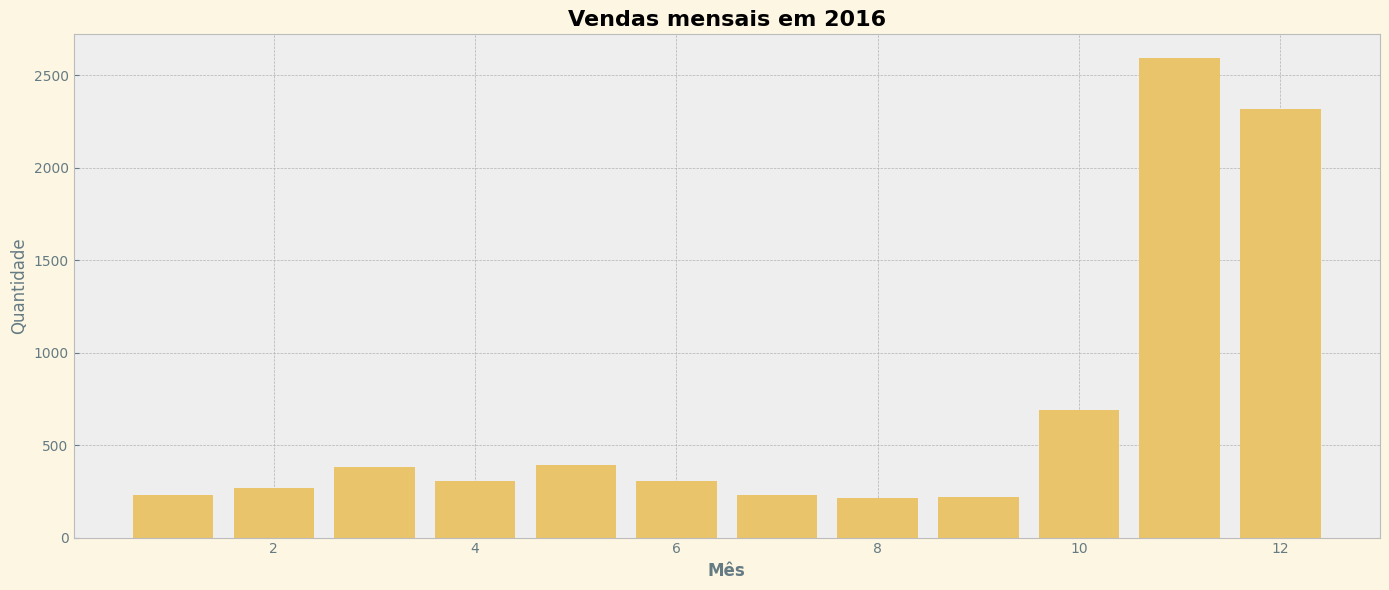

In [42]:
fig, ax = plt.subplots( figsize = (14,6))

ax.bar(vendas_mensais_2016.index, vendas_mensais_2016.values, color='#E9C46A')
ax.set_title("Vendas mensais em 2016", fontweight='bold', fontsize = 16)

ax.set_xlabel("Mês", fontweight = "bold")
ax.set_ylabel("Quantidade")

ax.grid(True)
plt.tight_layout()

plt.show()


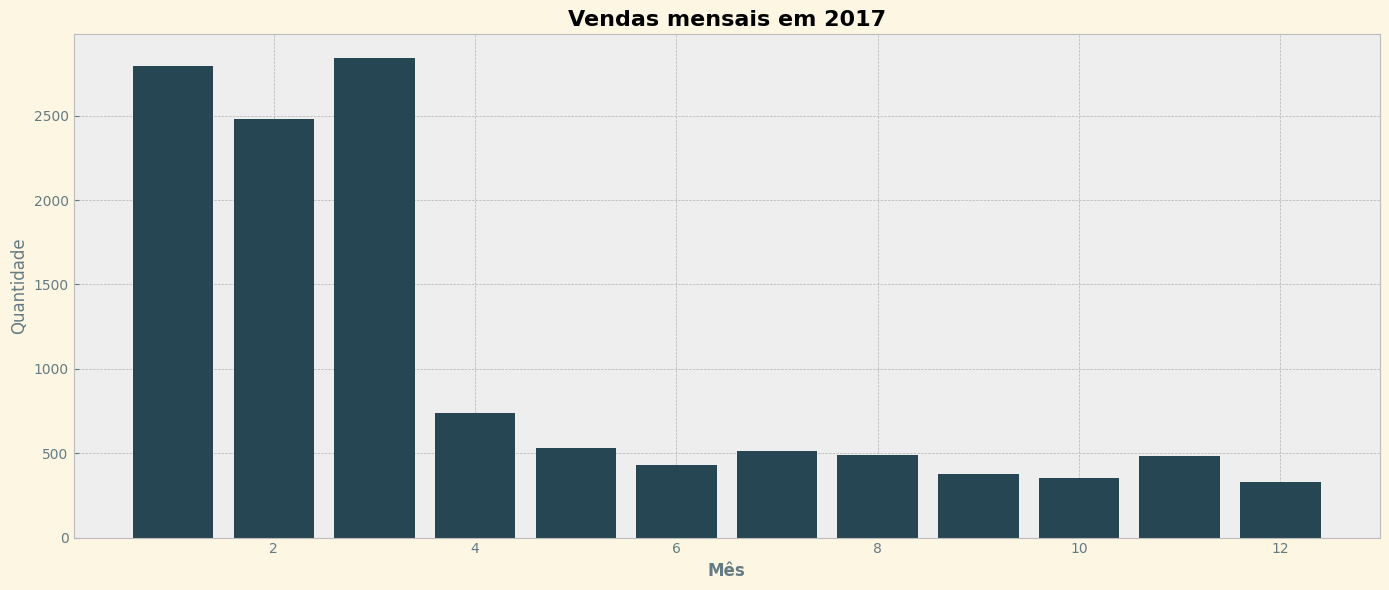

In [43]:
fig, ax = plt.subplots(figsize = (14,6))

ax.bar(vendas_mensais_2017.index, vendas_mensais_2017.values, color='#264653')

ax.set_title('Vendas mensais em 2017', fontweight='bold', fontsize = 16)
ax.set_xlabel("Mês", fontweight = "bold")
ax.set_ylabel("Quantidade")


ax.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,ano,mes,dia,hora,minuto,segundo
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10,30,9,58,11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,30,10,5,34
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,30,10,5,34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10,30,10,7,57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10,30,10,7,57


In [58]:
print(f"Vendas por parte do dia em 2016:\n {df_2016['TransactionNo'].groupby(df['Daypart']).nunique()}")

Vendas por parte do dia:
 Daypart
Afternoon    2049
Evening       115
Morning      1822
Night           1
Name: TransactionNo, dtype: int64


In [59]:
print(f"Vendas por parte do dia em 2016:\n {df_2017['TransactionNo'].groupby(df['Daypart']).nunique()}")


Vendas por parte do dia em 2016:
 Daypart
Afternoon    3040
Evening       146
Morning      2281
Night          11
Name: TransactionNo, dtype: int64


É evidente que o período da tarde lidera as vendas em ambos os anos.

In [62]:
df_2016['weekday'] = df_2016['DateTime'].dt.day_name()

pivot_2016 = df_2016.pivot_table(index='hora', columns='weekday', values='TransactionNo', aggfunc='count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_2016 = pivot_2016[ordered_days]

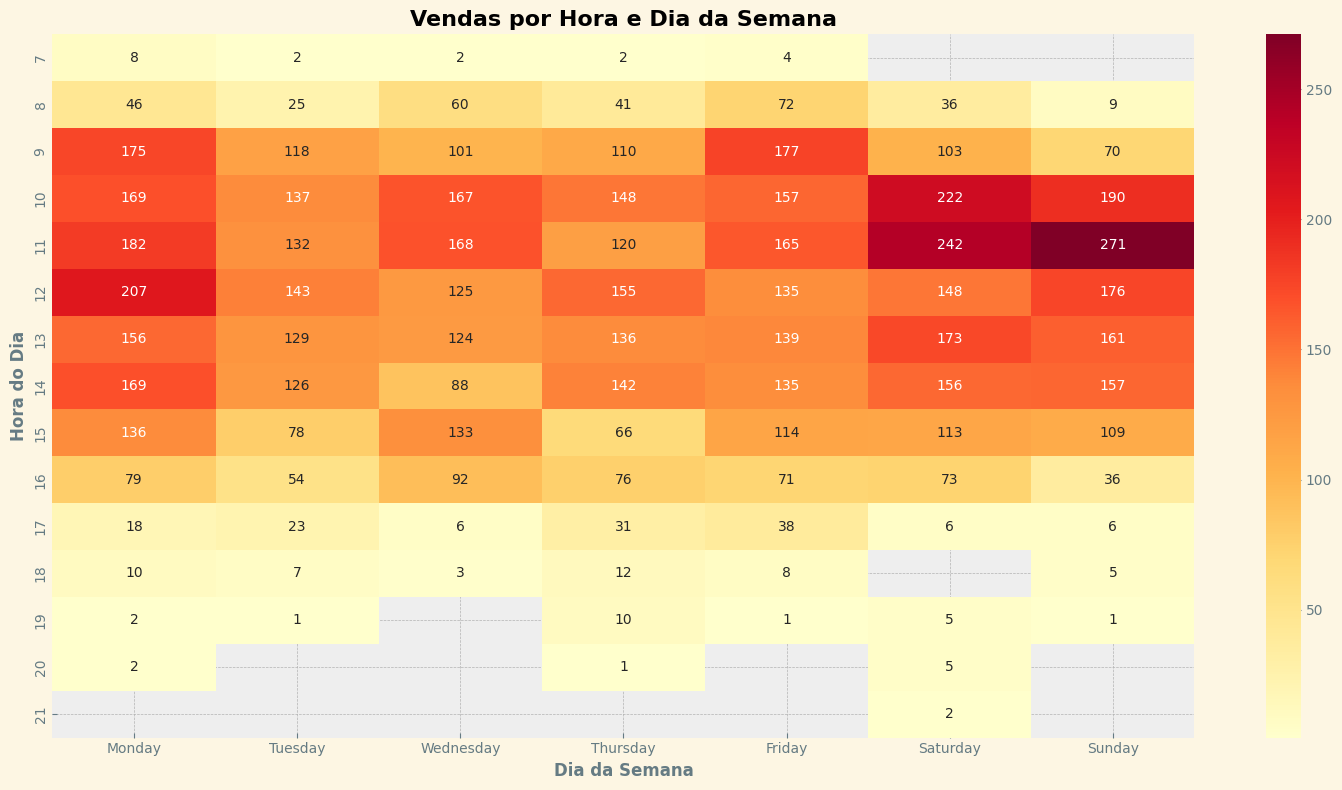

In [75]:
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_2016 ,cmap='YlOrRd', annot=True, fmt='.0f')

plt.title('Vendas por Hora e Dia da Semana em 2016', fontsize = 16, fontweight ='bold')
plt.ylabel('Hora do Dia', fontweight ='bold')
plt.xlabel('Dia da Semana', fontweight ='bold')
plt.tight_layout()
plt.show()

O maior volume de vendas está concentrado entre 9h e 16h.

In [81]:
df_2017['weekday'] = df_2017['DateTime'].dt.day_name()

pivot_2017 = df_2017.pivot_table(index= 'hora', columns='weekday', values= 'TransactionNo', aggfunc= 'count' )

pivot_2017 = pivot_2017[ordered_days]

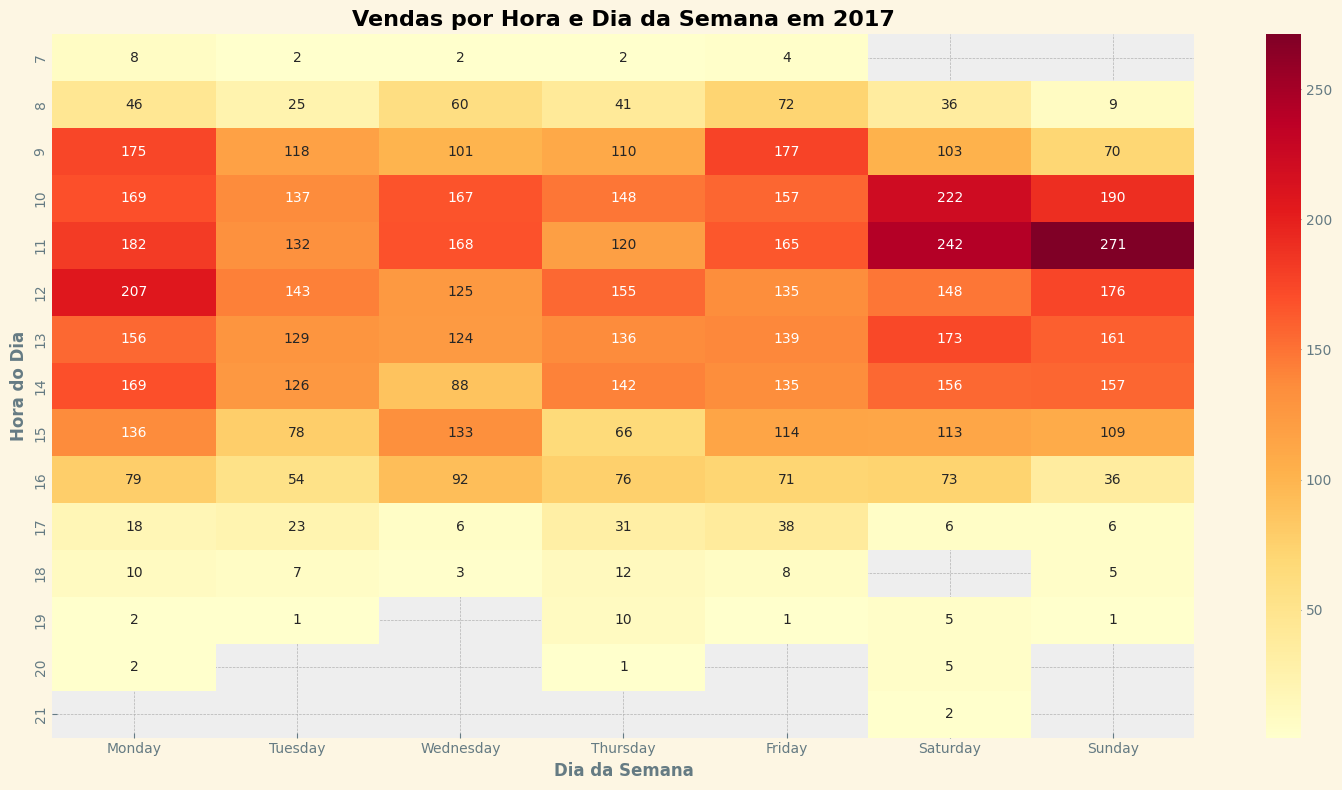

In [82]:
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_2016 ,cmap='YlOrRd', annot=True, fmt='.0f')

plt.title('Vendas por Hora e Dia da Semana em 2017', fontsize = 16, fontweight ='bold')
plt.ylabel('Hora do Dia', fontweight ='bold')
plt.xlabel('Dia da Semana', fontweight ='bold')
plt.tight_layout()
plt.show()